## Deploy Explainable AI: Algorithm Bias Detection Model Package from AWS Marketplace 


Algorithmic bias is a major concern in models predicting outcomes for people such as loan approval, hiring, committing crime in the future etc. Algorithmic Bias needs to be detected and corrected to ensure that historically disadvantaged groups are not being discriminated against. The solution utilizes bias metrics at different levels of strictness to identify demographic and statistical disparities in groups results.

This sample notebook shows you how to deploy Explainable AI: Algorithm Bias Detection using Amazon SageMaker.

> **Note**: This is a reference notebook and it cannot run unless you make changes suggested in the notebook.

#### Pre-requisites:
1. **Note**: This notebook contains elements which render correctly in Jupyter interface. Open this notebook from an Amazon SageMaker Notebook Instance or Amazon SageMaker Studio.
1. Ensure that IAM role used has **AmazonSageMakerFullAccess**
1. To deploy this ML model successfully, ensure that:
    1. Either your IAM role has these three permissions and you have authority to make AWS Marketplace subscriptions in the AWS account used: 
        1. **aws-marketplace:ViewSubscriptions**
        1. **aws-marketplace:Unsubscribe**
        1. **aws-marketplace:Subscribe**  
    2. or your AWS account has a subscription to Explainable AI: Algorithm Bias Detection. If so, skip step: [Subscribe to the model package](#1.-Subscribe-to-the-model-package)

#### Contents:
1. [Subscribe to the model package](#1.-Subscribe-to-the-model-package)
2. [Create an endpoint and perform real-time inference](#2.-Create-an-endpoint-and-perform-real-time-inference)
   1. [Create an endpoint](#A.-Create-an-endpoint)
   2. [Create input payload](#B.-Create-input-payload)
   3. [Perform real-time inference](#C.-Perform-real-time-inference)
   4. [Visualize output](#D.-Visualize-output)
   5. [Delete the endpoint](#E.-Delete-the-endpoint)
3. [Perform batch inference](#3.-Perform-batch-inference) 
4. [Clean-up](#4.-Clean-up)
    1. [Delete the model](#A.-Delete-the-model)
    2. [Unsubscribe to the listing (optional)](#B.-Unsubscribe-to-the-listing-(optional))
    

#### Usage instructions
You can run this notebook one cell at a time (By using Shift+Enter for running a cell).

### 1. Subscribe to the model package

To subscribe to the model package:
1. Open the model package listing page **Explainable AI: Algorithm Bias Detection**
1. On the AWS Marketplace listing, click on the **Continue to subscribe** button.
1. On the **Subscribe to this software** page, review and click on **"Accept Offer"** if you and your organization agrees with EULA, pricing, and support terms. 
1. Once you click on **Continue to configuration button** and then choose a **region**, you will see a **Product Arn** displayed. This is the model package ARN that you need to specify while creating a deployable model using Boto3. Copy the ARN corresponding to your region and specify the same in the following cell.

In [1]:
model_package_arn='arn:aws:sagemaker:us-east-2:786796469737:model-package/bias-detection'

In [3]:
import base64
import json 
import uuid
from sagemaker import ModelPackage
import sagemaker as sage
from sagemaker import get_execution_role
from sagemaker import ModelPackage
#from urllib.parse import urlparse
import boto3
from IPython.display import Image
from PIL import Image as ImageEdit
#import urllib.request
import numpy as np

In [4]:
role = get_execution_role()

sagemaker_session = sage.Session()

bucket=sagemaker_session.default_bucket()
bucket

'sagemaker-us-east-2-786796469737'

### 2. Create an endpoint and perform real-time inference

If you want to understand how real-time inference with Amazon SageMaker works, see [Documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/how-it-works-hosting.html).

In [7]:
model_name='bias-detection-v3'

content_type='text/csv'

real_time_inference_instance_type='ml.m5.xlarge'
batch_transform_inference_instance_type='ml.m5.large'

#### A. Create an endpoint

In [8]:

def predict_wrapper(endpoint, session):
    return sage.RealTimePredictor(endpoint, session,content_type)

#create a deployable model from the model package.
model = ModelPackage(role=role,
                    model_package_arn=model_package_arn,
                    sagemaker_session=sagemaker_session,
                    predictor_cls=predict_wrapper)

#Deploy the model
predictor = model.deploy(1, real_time_inference_instance_type, endpoint_name=model_name)

-----------!

Once endpoint has been created, you would be able to perform real-time inference.

#### B. Create input payload

In [11]:
import pandas as pd
file_name = './data/input/real-time/input.csv'
data_frame = pd.read_csv(file_name)

<Add code snippet that shows the payload contents>

In [12]:
print(data_frame.head(10))

   Pred_y  Privileged  Org_y
0       0           0      0
1       1           0      0
2       1           0      0
3       0           0      1
4       1           0      0
5       0           0      0
6       0           1      1
7       0           0      0
8       1           0      1
9       0           1      1


In [20]:
output_file_name = 'output.txt'

#### C. Perform real-time inference

In [16]:
!aws sagemaker-runtime invoke-endpoint \
    --endpoint-name 'bias-detection-v3' \
    --body fileb://$file_name \
    --content-type 'text/csv' \
    --region us-east-2 \
    output.txt

{
    "InvokedProductionVariant": "AllTraffic", 
    "ContentType": "text/plain; charset=utf-8"
}


#### D. Visualize output

In [19]:
output = open("./data/output/real-time/output.txt","r+")
#print(output.read())

# copy and paste the output below in a browser tab to see the result
data = output.read()
print(data)

%2BO5/W%2B3q/3dV1WBoPBIAAAAAAAAAAAAACAxbDO7AoAAAAAAAAAAAAAADIWiWIAAAAAAAAAAAAAsDAkigEAAAAAAAAAAADAwpAoBgAAAAAAAAAAAAALQ6IYAAAAAAAAAAAAACwMiWIAAAAAAAAAAAAAsDAkigEAAAAAAAAAAADAwpAoBgAAAAAAAAAAAAALQ6IYAAAAAAAAAAAAACwMiWIAAAAAyGI8PDzk6uoqLy%2BvzK4KXmKHDh2Sq6urXF1ddejQocyuDgAAAAAgjWXL7AoAAAAAQFZ06NAh9e3bN8nrT5w4UR07dkzHGiE9TJs2TdOnTzf9Xq9ePS1cuPC52x07dkw9e/Y0K7t48WKa1w8AAAAAgJSiRzEAAAAAAEl05MgR3b1797nrrV27NgNq85SXl5dcXV3l4eGRYccEAAAAAGR99CgGAAAAgFTq0aNHnN6jsRUuXDjNjrdjx4402xeSzt7eXhEREVq3bp0GDRqU4HpPnjzR5s2bzbbJiurVq0cvaAAAAAB4iZEoBgAAAIBUypcvn1xcXDK7GkhnHh4e2rRp03MTxbt27VJgYKDs7e3VuHFjbd%2B%2BPQNrCQAAAABA0jD0NAAAAAAASdChQwdJ0uXLl/XPP/8kuJ5x2OlmzZrJ0dExI6oGAAAAAECy0aMYAAAAADJQWFiYdu3apX379uns2bO6ffu2wsPDlTt3bpUvX17NmjVT9%2B7dlStXrgT34eHhIV9fX7355puaNGmS2bJDhw6pb9%2B%2BkqSFCxeqTp06WrVqldauXaurV68qICBAHTp00KRJk%2BKsW69ePW3cuFHLly/XxYsXFRYWpiJFiui1117ToEGDlCdPnuee37Zt27Ru3TqdPn1a/v7%2Bsre3V8mSJeXh4aE%2BffrIyckpwW3//fdf/fHHHzp06JB8fX0VGRmpPHnyKF%2B%2BfKpcubJeeeUVNW/eXHZ2dmbbRUdHa%2B3atdqwYYMuXL

#### <font>Copy and paste the output above in a browser tab to see the result. Save the file opened in browser as png image and result will look like this</font>

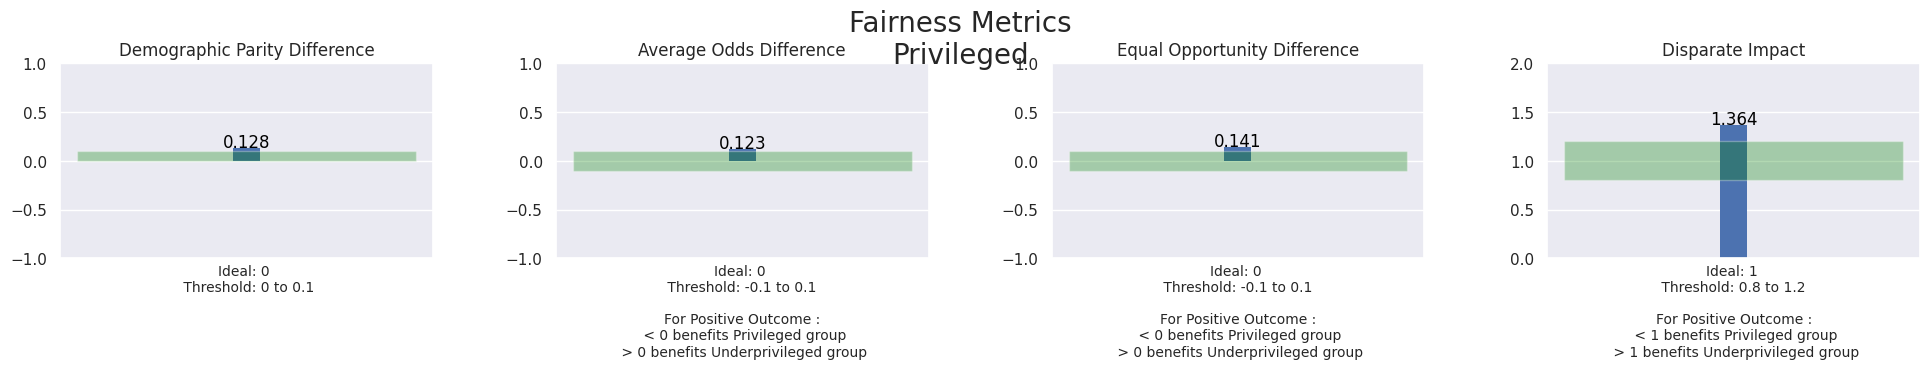

In [29]:
from IPython.display import display
from PIL import Image


path="./data/output/real-time/output.png"
display(Image.open(path))

#### E. Delete the endpoint

Now that you have successfully performed a real-time inference, you do not need the endpoint any more. You can terminate the endpoint to avoid being charged.

In [21]:
predictor=sage.RealTimePredictor(model_name, sagemaker_session,content_type)
predictor.delete_endpoint(delete_endpoint_config=True)

### 3. Perform batch inference

In this section, you will perform batch inference using multiple input payloads together. If you are not familiar with batch transform, and want to learn more, see these links:
1. [How it works](https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-batch-transform.html)
2. [How to run a batch transform job](https://docs.aws.amazon.com/sagemaker/latest/dg/how-it-works-batch.html)

In [23]:
#upload the batch-transform job input files to S3
transform_input_folder = "data/input/batch"
transform_input = sagemaker_session.upload_data(transform_input_folder, key_prefix=model_name) 
print("Transform input uploaded to " + transform_input)

Transform input uploaded to s3://sagemaker-us-east-2-786796469737/bias-detection-v3


In [24]:
#Run the batch-transform job
transformer = model.transformer(1, batch_transform_inference_instance_type)
transformer.transform(transform_input, content_type=content_type)
transformer.wait()

.....................
Starting the inference server with 2 workers.
2021/01/06 15:05:01 [crit] 12#12: *1 connect() to unix:/tmp/gunicorn.sock failed (2: No such file or directory) while connecting to upstream, client: 169.254.255.130, server: , request: "GET /ping HTTP/1.1", upstream: "http://unix:/tmp/gunicorn.sock:/ping", host: "169.254.255.131:8080"
169.254.255.130 - - [06/Jan/2021:15:05:01 +0000] "GET /ping HTTP/1.1" 502 182 "-" "Go-http-client/1.1"
2021/01/06 15:05:01 [crit] 12#12: *3 connect() to unix:/tmp/gunicorn.sock failed (2: No such file or directory) while connecting to upstream, client: 169.254.255.130, server: , request: "GET /ping HTTP/1.1", upstream: "http://unix:/tmp/gunicorn.sock:/ping", host: "169.254.255.131:8080"
169.254.255.130 - - [06/Jan/2021:15:05:01 +0000] "GET /ping HTTP/1.1" 502 182 "-" "Go-http-client/1.1"
[2021-01-06 15:05:01 +0000] [11] [INFO] Starting gunicorn 20.0.4
[2021-01-06 15:05:01 +0000] [11] [INFO] Listening at: unix:/tmp/gunicorn.sock (11)
[202

In [25]:
#output is available on following path
transformer.output_path

's3://sagemaker-us-east-2-786796469737/bias-detection-2021-01-06-14-20-33-334-2021-01-06-15-01-47-146'

In [26]:
s3_conn = boto3.client("s3")
bucket_name="sagemaker-us-east-2-786796469737"
with open('./data/output/batch/output.txt', 'wb') as f:
    s3_conn.download_fileobj(bucket_name, 'bias-detection-2021-01-06-14-20-33-334-2021-01-06-15-01-47-146'+'/input.csv.out', f)
    print("Output file loaded from bucket")

Output file loaded from bucket


In [27]:
output = open("./data/output/batch/output.txt","r+")
#print(output.read())

# copy and paste the output below in a browser tab to see the result
data = output.read()
print(data)

%2BO5/W%2B3q/3dV1WBoPBIAAAAAAAAAAAAACAxbDO7AoAAAAAAAAAAAAAADIWiWIAAAAAAAAAAAAAsDAkigEAAAAAAAAAAADAwpAoBgAAAAAAAAAAAAALQ6IYAAAAAAAAAAAAACwMiWIAAAAAAAAAAAAAsDAkigEAAAAAAAAAAADAwpAoBgAAAAAAAAAAAAALQ6IYAAAAAAAAAAAAACwMiWIAAAAAyGI8PDzk6uoqLy%2BvzK4KXmKHDh2Sq6urXF1ddejQocyuDgAAAAAgjWXL7AoAAAAAQFZ06NAh9e3bN8nrT5w4UR07dkzHGiE9TJs2TdOnTzf9Xq9ePS1cuPC52x07dkw9e/Y0K7t48WKa1w8AAAAAgJSiRzEAAAAAAEl05MgR3b1797nrrV27NgNq85SXl5dcXV3l4eGRYccEAAAAAGR99CgGAAAAgFTq0aNHnN6jsRUuXDjNjrdjx4402xeSzt7eXhEREVq3bp0GDRqU4HpPnjzR5s2bzbbJiurVq0cvaAAAAAB4iZEoBgAAAIBUypcvn1xcXDK7GkhnHh4e2rRp03MTxbt27VJgYKDs7e3VuHFjbd%2B%2BPQNrCQAAAABA0jD0NAAAAAAASdChQwdJ0uXLl/XPP/8kuJ5x2OlmzZrJ0dExI6oGAAAAAECy0aMYAAAAADJQWFiYdu3apX379uns2bO6ffu2wsPDlTt3bpUvX17NmjVT9%2B7dlStXrgT34eHhIV9fX7355puaNGmS2bJDhw6pb9%2B%2BkqSFCxeqTp06WrVqldauXaurV68qICBAHTp00KRJk%2BKsW69ePW3cuFHLly/XxYsXFRYWpiJFiui1117ToEGDlCdPnuee37Zt27Ru3TqdPn1a/v7%2Bsre3V8mSJeXh4aE%2BffrIyckpwW3//fdf/fHHHzp06JB8fX0VGRmpPHnyKF%2B%2BfKpcubJeeeUVNW/eXHZ2dmbbRUdHa%2B3atdqwYYMuXL

#### <font>Copy and paste the output above in a browser tab to see the result. Save the file opened in browser as png image and result will look like this</font>

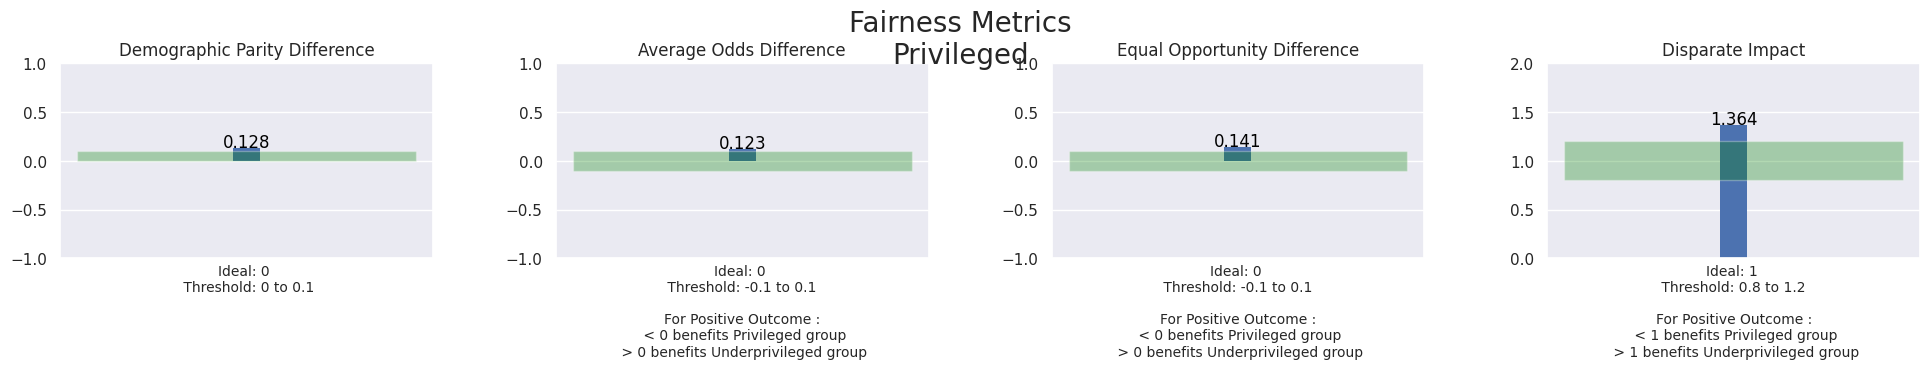

In [30]:
from IPython.display import display
from PIL import Image


path="./data/output/batch/output.png"
display(Image.open(path))

### 4. Clean-up

#### A. Delete the model

In [ ]:
model.delete_model()

#### B. Unsubscribe to the listing (optional)

If you would like to unsubscribe to the model package, follow these steps. Before you cancel the subscription, ensure that you do not have any [deployable model](https://console.aws.amazon.com/sagemaker/home#/models) created from the model package or using the algorithm. Note - You can find this information by looking at the container name associated with the model. 

**Steps to unsubscribe to product from AWS Marketplace**:
1. Navigate to __Machine Learning__ tab on [__Your Software subscriptions page__](https://aws.amazon.com/marketplace/ai/library?productType=ml&ref_=mlmp_gitdemo_indust)
2. Locate the listing that you want to cancel the subscription for, and then choose __Cancel Subscription__  to cancel the subscription.

